In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de RS

In [2]:
gdf = gpd.read_file('Shapes/RR/14SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 14 columns):
ID            913 non-null int64
CD_GEOCODI    913 non-null object
TIPO          913 non-null object
CD_GEOCODB    396 non-null object
NM_BAIRRO     396 non-null object
CD_GEOCODS    913 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    913 non-null object
NM_DISTRIT    913 non-null object
CD_GEOCODM    913 non-null object
NM_MUNICIP    913 non-null object
NM_MICRO      913 non-null object
NM_MESO       913 non-null object
geometry      913 non-null object
dtypes: int64(1), object(13)
memory usage: 99.9+ KB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para RR

In [4]:
dados = pd.read_csv('Planilhas/RR/CSV/Basico_RR.csv',sep =';')

In [5]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(824, 13)

In [6]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,140002705000001,309.0,1218.0,"3,94","4,55","879,87","2432443,53",971,"2596474,96","500,78","1162279,89","817,48","1639247,37"
1,140002705000002,69.0,247.0,"3,58","5,95","489,39","154116,36","649,38","99554,08","293,39","161189,56","595,68","147057,51"
2,140002705000003,5.0,16.0,"3,2","2,7",204,78030,510,0,"182,14","64310,44",510,0
3,140002705000004,44.0,169.0,"3,84","4,65","881,82","4525466,38","923,81","4706482,69","495,06","1774356,71","708,83","2396092,05"
4,140002705000005,42.0,208.0,"4,95","8,05","293,64","107862,53","536,22","65031,45","137,26","78449,71","565,21","81235,02"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [7]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [8]:
rr = pd.merge(gdf,dados, on='CD_GEOCODI')

In [9]:
rr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 824 entries, 0 to 823
Data columns (total 26 columns):
ID            824 non-null int64
CD_GEOCODI    824 non-null int64
TIPO          824 non-null object
CD_GEOCODB    392 non-null object
NM_BAIRRO     392 non-null object
CD_GEOCODS    824 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    824 non-null object
NM_DISTRIT    824 non-null object
CD_GEOCODM    824 non-null object
NM_MUNICIP    824 non-null object
NM_MICRO      824 non-null object
NM_MESO       824 non-null object
geometry      824 non-null object
V001          822 non-null float64
V002          822 non-null float64
V003          822 non-null object
V004          822 non-null object
V005          822 non-null object
V006          822 non-null object
V007          807 non-null object
V008          807 non-null object
V009          824 non-null object
V010          824 non-null object
V011          813 non-null object
V012          813 non-null object
dtype

In [10]:
del gdf
del dados

Text(0.5,1,'RORAIMA - RR')

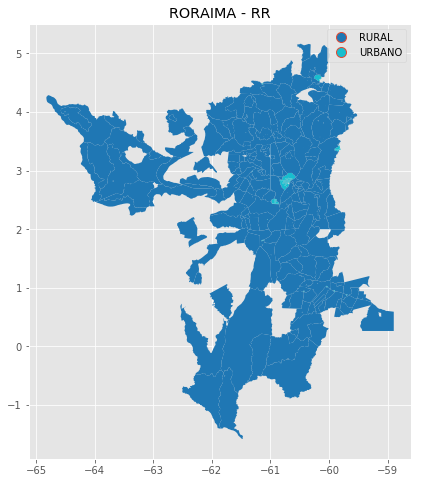

In [11]:
plt.style.use('ggplot')
rr.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('RORAIMA - RR')

# Utilizando a projeção de Albers para calcular as áreas

In [12]:
rr['AREA'] = rr.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [13]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [14]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [15]:
areas_urbanas_rr_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='RR']
del areas_urbanas_br_15

In [16]:
areas_urbanas_rr_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
1022,Bonfim,RR,7.774,1400159.0,"POLYGON ((-59.8383486240541 3.370764345677328,...",7.774357
1025,CantÃ¡,RR,1.072,1400175.0,"POLYGON ((-60.59938651885025 2.61482395234078,...",1.072141
1029,CaracaraÃ­,RR,7.117,1400209.0,POLYGON ((-61.13292764030789 1.830957238702632...,7.116637
1072,Caroebe,RR,2.898,1400233.0,POLYGON ((-59.70249109930894 0.882409406790789...,2.897920
1077,Iracema,RR,1.926,1400282.0,POLYGON ((-61.05440124730998 2.170192172253837...,1.926046


In [17]:
areas_urbanas_rr_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_rr_15['CD_GEOCODM']=areas_urbanas_rr_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_rr_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15 entries, 1022 to 1197
Data columns (total 6 columns):
Municipio     15 non-null object
UF            15 non-null object
Area_Urb      15 non-null float64
CD_GEOCODM    15 non-null int64
geometry      15 non-null object
Area          15 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 840.0+ bytes


In [18]:
rr.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

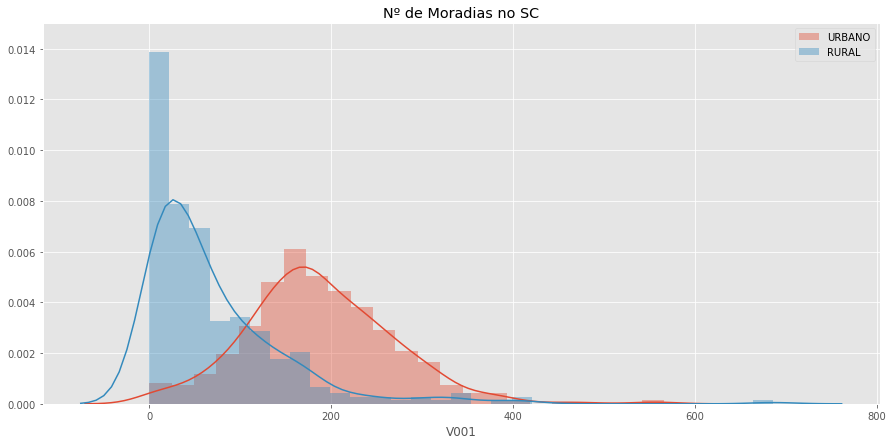

In [19]:
plt.style.use('ggplot')
rr['V001'] = pd.to_numeric(rr['V001'])
rr['V002'] = pd.to_numeric(rr['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(rr[rr['TIPO'] =='URBANO']['V001'])
sns.distplot(rr[rr['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.015))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [24]:
print('RURAL','\n',rr[rr['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',rr[rr['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    332.000000
mean      71.093373
std       80.256050
min        0.000000
25%       17.750000
50%       49.000000
75%       96.500000
max      686.000000
Name: V001, dtype: float64
URBANO 
 count    492.000000
mean     187.481707
std       81.461208
min        0.000000
25%      134.750000
50%      177.500000
75%      235.250000
max      566.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.02)

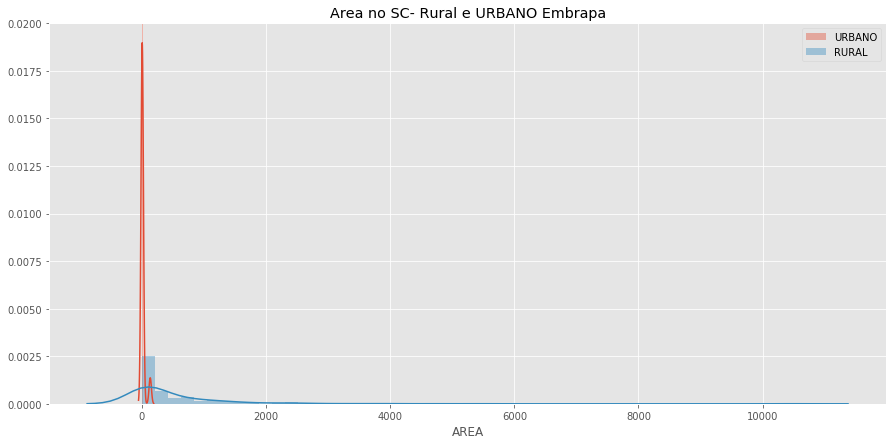

In [26]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_rr_15['Area'])
plt.legend(['URBANO'])
sns.distplot(rr[rr['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')
plt.ylim((0,0.02))

## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_rr_15['Area'].describe())
print('RURAL','\n',rr[rr['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     15.000000
mean      12.670586
std       33.394379
min        0.772067
25%        2.235916
50%        3.532208
75%        6.487081
max      132.978711
Name: Area, dtype: float64
RURAL 
 count      332.000000
mean       502.188913
std        942.043131
min          0.024511
25%          0.412691
50%        174.057591
75%        677.889266
max      10492.263873
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

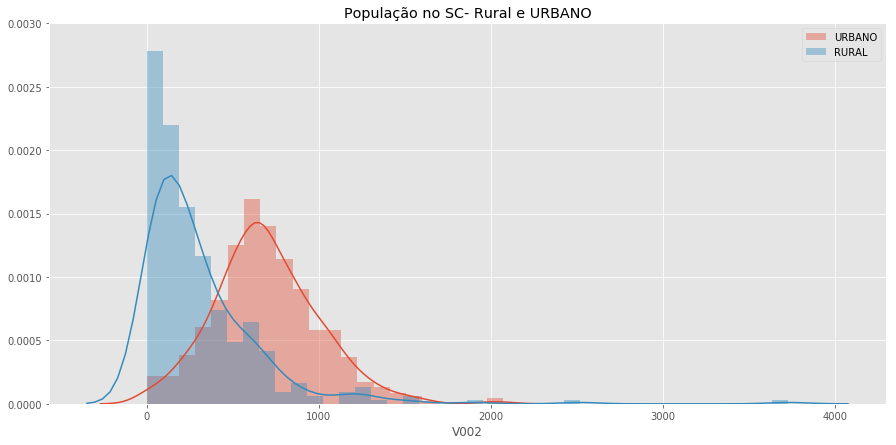

In [29]:
fig = plt.figure(figsize = (15,7))

sns.distplot(rr[rr['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(rr[rr['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [30]:
print('RURAL','\n',rr[rr['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',rr[rr['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count     332.000000
mean      313.111446
std       368.517184
min         0.000000
25%        91.000000
50%       208.500000
75%       416.500000
max      3728.000000
Name: V002, dtype: float64
URBANO 
 count     492.000000
mean      698.000000
std       308.029008
min         0.000000
25%       495.500000
50%       669.000000
75%       876.250000
max      2073.000000
Name: V002, dtype: float64


In [21]:
rr['Densidade Moradias'] = rr.V001/rr.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

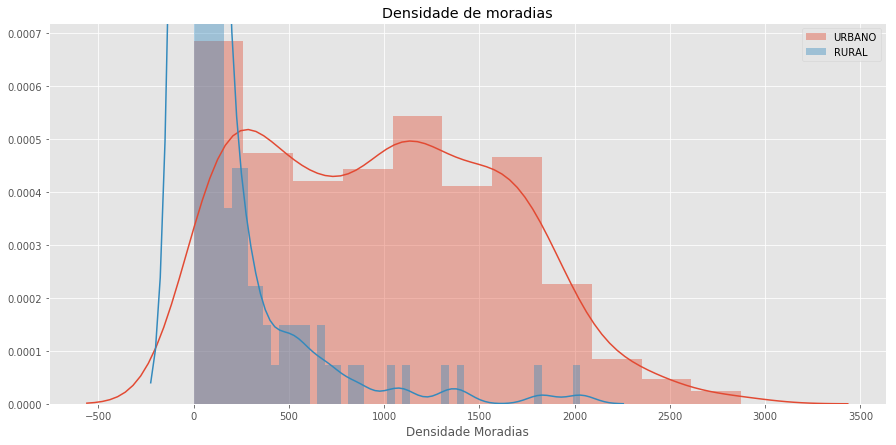

In [22]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(rr[rr['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(rr[rr['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')

In [23]:
print('RURAL','\n',rr[rr['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',rr[rr['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count     332.000000
mean       89.311114
std       239.574794
min         0.000000
25%         0.075976
50%         0.347497
75%        67.638342
max      2030.923135
Name: Densidade Moradias, dtype: float64
URBANO 
 count     492.000000
mean      985.444444
std       645.251446
min         0.000000
25%       389.975083
50%      1000.463712
75%      1505.001981
max      2874.197921
Name: Densidade Moradias, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [26]:
max_area = areas_urbanas_rr_15['Area'].mean() 
min_pop =  rr[rr['TIPO']=='URBANO']['V002'].mean()
min_mor =  rr[rr['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = rr[rr['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [27]:
scrcu = rr[(rr.TIPO=='RURAL')&(rr.V001 >= min_mor)&(rr.AREA <= max_area)&(rr.V002>= min_pop)\
           &(rr['Densidade Moradias']>= min_densidade_moradias)]

In [30]:
scrcu.count()

ID                    0
CD_GEOCODI            0
TIPO                  0
CD_GEOCODB            0
NM_BAIRRO             0
CD_GEOCODS            0
NM_SUBDIST            0
CD_GEOCODD            0
NM_DISTRIT            0
CD_GEOCODM            0
NM_MUNICIP            0
NM_MICRO              0
NM_MESO               0
geometry              0
V001                  0
V002                  0
V003                  0
V004                  0
V005                  0
V006                  0
V007                  0
V008                  0
V009                  0
V010                  0
V011                  0
V012                  0
AREA                  0
Densidade Moradias    0
dtype: int64

# Visualizando as areas urbanas no estado de RR - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


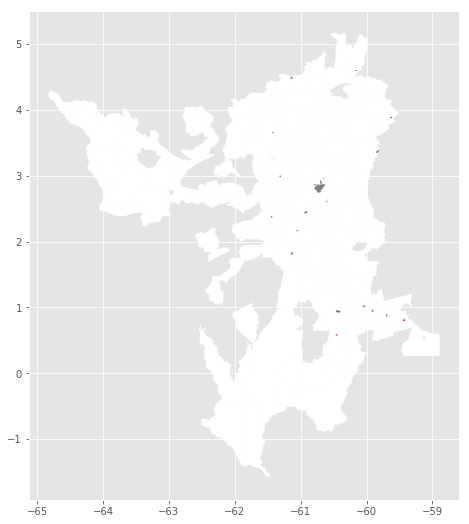

In [36]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
rr.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_rr_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [31]:
areas_urbanas_rr_15.rename(columns={'Area':'AREA'},inplace = True)

In [32]:
fonte = np.zeros(areas_urbanas_rr_15.shape[0])
areas_urbanas_rr_15['FONTE'] = fonte

In [33]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

In [34]:
regioes_urbanas_rr = scrcu[['geometry','FONTE']].append(areas_urbanas_rr_15[['geometry','FONTE']])

In [35]:
regioes_urbanas_rr.head()

,geometry,FONTE
1022,"POLYGON ((-59.8383486240541 3.370764345677328,...",0.0
1025,"POLYGON ((-60.59938651885025 2.61482395234078,...",0.0
1029,POLYGON ((-61.13292764030789 1.830957238702632...,0.0
1072,POLYGON ((-59.70249109930894 0.882409406790789...,0.0
1077,POLYGON ((-61.05440124730998 2.170192172253837...,0.0


In [36]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_rr['FONTE'] = regioes_urbanas_rr['FONTE'].apply(fonte) 

In [37]:
regioes_urbanas_rr.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_rr.shp')

In [43]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_rr[regioes_urbanas_rr['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_rr[regioes_urbanas_rr['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_rr.crs)

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
